In [58]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [133]:
data = pd.read_csv('data/KIA타이거즈.csv', index_col = 'day_text')

In [134]:
data

,team_text,H_text,HR_text,S_text,ST_text,DU_text,ER_text,result_text,location,temp,rain,humidity
day_text,,,,,,,,,,,,
4.7,KIA 타이거즈,6,0,2,8,0,3,0,인천,8.3,0.0,33.0
4.8,KIA 타이거즈,6,0,0,3,2,0,0,인천,10.6,0.0,68.0
4.11,KIA 타이거즈,7,0,2,8,1,0,1,광주,11.8,0.0,71.0
4.12,KIA 타이거즈,5,1,0,8,1,1,0,광주,14.5,0.0,32.0
4.13,KIA 타이거즈,11,0,0,3,0,0,1,서울,11.6,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9.21토,KIA 타이거즈,8,0,0,7,1,1,0,서울,20.2,0.0,69.0
9.23월,KIA 타이거즈,7,0,1,10,0,0,0,수원,21.7,0.0,61.0
9.24화,KIA 타이거즈,11,1,0,4,0,1,1,광주,22.8,0.0,56.0


### 한화이글스 8년치 데이터 승률 43.24%

In [91]:
data_result = data[['team_text', 'result_text', 'location']].groupby(['team_text','result_text']).count()
data_result

location
team_text result_text          
한화 이글스    0                 613
          1                 467

### 온도(5도 기준)에 따른 승패

<AxesSubplot:xlabel='temp', ylabel='count'>

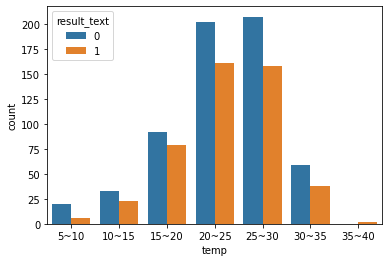

In [92]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
data['temp'] = pd.cut(data['temp'], bins = bins, labels = labels)
sns.countplot(data = data, x = 'temp', hue='result_text')

### 강수량(3mm 기준)에 따른 승패

<AxesSubplot:xlabel='rain', ylabel='count'>

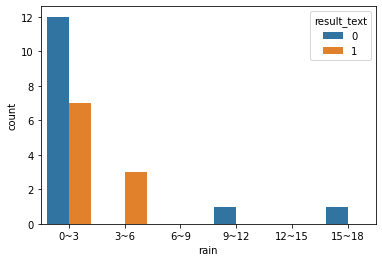

In [93]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
data['rain'] = pd.cut(data['rain'], bins = bins, labels = labels)
sns.countplot(data = data, x = 'rain', hue='result_text')

### 습도(10% 기준)에 따른 승패

<AxesSubplot:xlabel='humidity', ylabel='count'>

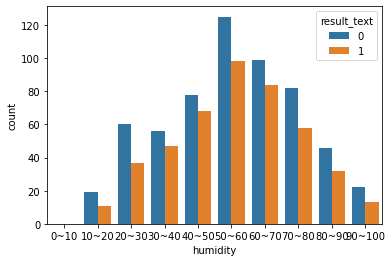

In [94]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
data['humidity'] = pd.cut(data['humidity'], bins = bins, labels = labels)
sns.countplot(data = data, x = 'humidity', hue='result_text')

### 경기장소에 따른 승패

<AxesSubplot:xlabel='location', ylabel='count'>

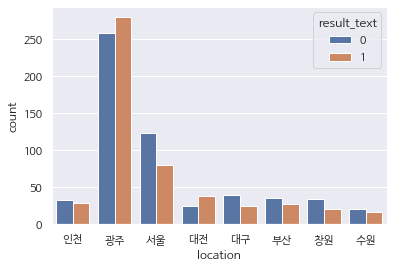

In [135]:
import matplotlib.font_manager as fm

sns.set(font="Hancom Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.countplot(data=data, x='location', hue = 'result_text')